In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely import Point
import contextily as cx
import seaborn as sns
import xlrd
import ee
import folium

In [119]:
ee.Authenticate()
ee.Initialize()

In [2]:
SD_DUIs_df = pd.read_csv("SWITRS_SD_Alcohol.csv")
print(len(SD_DUIs_df))
SD_DUIs_df.head(4)

## Check the Lat/Long data and Point_x and Point_y data being used 

17610


/var/folders/_9/g2w7mkvs6lngl3jl22mtjls80000gn/T/ipykernel_39028/2824195577.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  SD_DUIs_df = pd.read_csv("SWITRS_SD_Alcohol.csv")


CASE_ID  ACCIDENT_YEAR   PROC_DATE  JURIS COLLISION_DATE  COLLISION_TIME  \
0   682021           2021  2021-07-21   3709     2021-06-08             855   
1  5403147           2012  2012-02-09   3700     2012-01-09            1740   
2  5403289           2012  2014-04-07   9645     2012-02-04             354   
3  5403311           2012  2014-04-07   3711     2012-02-18             209   

  OFFICER_ID REPORTING_DISTRICT  DAY_OF_WEEK  CHP_SHIFT  ...  COUNT_MC_KILLED  \
0     NC0528                NaN            2          5  ...                0   
1     SH1504                NaN            1          5  ...                0   
2     019563                NaN            6          3  ...                0   
3       5916                NaN            6          5  ...                0   

   COUNT_MC_INJURED  PRIMARY_RAMP  SECONDARY_RAMP  LATITUDE  LONGITUDE  \
0                 0            -               -        NaN        NaN   
1                 0            -               -        NaN        NaN   
2                 0            -               -   32.65141 -117.06737   
3                 0            -               -        NaN        NaN   

      COUNTY           CITY     POINT_X    POINT_Y  
0  SAN DIEGO  NATIONAL CITY -117.106194  32.674122  
1  SAN DIEGO     SAN MARCOS -117.207202  33.153075  
2  SAN DIEGO    CHULA VISTA -117.065712  32.650307  
3  SAN DIEGO      SAN DIEGO -117.042671  32.682065  

[4 rows x 80 columns]

In [3]:
SD_17_21_DUIs_df = SD_DUIs_df.loc[SD_DUIs_df["ACCIDENT_YEAR"].astype(str).str.contains("2017|2018|2019|2020|2021")]
print(len(SD_17_21_DUIs_df))
SD_17_21_DUIs_df.head(4)
# 2012 - 1708
# 2013 - 1718
# 2014 - 1656
# 2015 - 1782
# 2016 - 1788
# 2017 - 1728
# 2018 - 1764
# 2019 - 1794
# 2020 - 1627
# 2021 - 2045
# 2022 - 0
# 2023 - 0


8958


CASE_ID  ACCIDENT_YEAR   PROC_DATE  JURIS COLLISION_DATE  \
0      682021           2021  2021-07-21   3709     2021-06-08   
3256  6292908           2017  2017-10-04   3710     2017-05-05   
3257  6292915           2017  2017-09-28   3710     2017-06-28   
3258  6292920           2017  2017-10-05   3703     2017-08-20   

      COLLISION_TIME OFFICER_ID REPORTING_DISTRICT  DAY_OF_WEEK  CHP_SHIFT  \
0                855     NC0528                NaN            2          5   
3256            2135     OC1355                006            5          5   
3257            2124     OC1185                016            3          5   
3258              23       1247                NaN            7          5   

      ...  COUNT_MC_KILLED  COUNT_MC_INJURED  PRIMARY_RAMP  SECONDARY_RAMP  \
0     ...                0                 0            -               -    
3256  ...                0                 0            -               -    
3257  ...                1                 0            -               -    
3258  ...                0                 0            -               -    

      LATITUDE  LONGITUDE     COUNTY           CITY     POINT_X    POINT_Y  
0          NaN        NaN  SAN DIEGO  NATIONAL CITY -117.106194  32.674122  
3256  33.19926 -117.34341  SAN DIEGO      OCEANSIDE -117.375680  33.201410  
3257       NaN        NaN  SAN DIEGO      OCEANSIDE -117.331020  33.225860  
3258       NaN        NaN  SAN DIEGO       CORONADO -117.175839  32.679712  

[4 rows x 80 columns]

In [4]:
LA_DUIs_df = pd.read_csv("SWITRS_LA_Alcohol.csv")
print(len(LA_DUIs_df))
LA_DUIs_df.head(4)

47269


CASE_ID  ACCIDENT_YEAR   PROC_DATE  JURIS COLLISION_DATE  COLLISION_TIME  \
0  5480205           2012  2013-06-22   1942     2012-01-23            2000   
1  5491678           2012  2013-07-20   1955     2012-02-26            2215   
2  5598772           2012  2013-07-13   1900     2012-02-26            2200   
3  5602387           2012  2013-08-14   1942     2012-04-14             625   

  OFFICER_ID REPORTING_DISTRICT  DAY_OF_WEEK  CHP_SHIFT  ...  COUNT_MC_KILLED  \
0      38314               1659            1          5  ...                0   
1      40620                  4            7          5  ...                0   
2     439951              BELLF            7          5  ...                0   
3      36607               0326            6          5  ...                0   

   COUNT_MC_INJURED  PRIMARY_RAMP  SECONDARY_RAMP LATITUDE LONGITUDE  \
0                 0            -               -       NaN       NaN   
1                 0            -               -       NaN       NaN   
2                 0            -               -       NaN       NaN   
3                 0            -               -       NaN       NaN   

        COUNTY         CITY     POINT_X    POINT_Y  
0  LOS ANGELES  LOS ANGELES -118.277883  34.253200  
1  LOS ANGELES       POMONA -117.750272  34.057966  
2  LOS ANGELES   BELLFLOWER -118.130285  33.890716  
3  LOS ANGELES  LOS ANGELES -118.300282  34.032725  

[4 rows x 80 columns]

In [5]:
LA_17_21_DUIs_df = LA_DUIs_df.loc[LA_DUIs_df["ACCIDENT_YEAR"].astype(str).str.contains("2017|2018|2019|2020|2021")]
print(len(LA_17_21_DUIs_df))
LA_17_21_DUIs_df.head(5)
# 2012 - 4474
# 2013 - 4468
# 2014 - 4672
# 2015 - 4706
# 2016 - 5229
# 2017 - 4954
# 2018 - 5032
# 2019 - 4986
# 2020 - 4133
# 2021 - 4615

23720


CASE_ID  ACCIDENT_YEAR   PROC_DATE  JURIS COLLISION_DATE  COLLISION_TIME  \
6   91626518           2021  2021-11-17   9525     2021-11-10            2110   
7   91639765           2021  2021-12-01   9565     2021-11-23            2200   
8   91562581           2021  2021-09-03   9590     2021-08-25             235   
9   91583942           2021  2021-09-30   9525     2021-09-20             401   
10  91587497           2021  2021-10-13   9565     2021-09-22             805   

   OFFICER_ID REPORTING_DISTRICT  DAY_OF_WEEK  CHP_SHIFT  ...  \
6      022617                NaN            3          2  ...   
7      021855                NaN            2          3  ...   
8      021823                NaN            3          3  ...   
9      019890                NaN            1          3  ...   
10     017289                NaN            3          1  ...   

    COUNT_MC_KILLED  COUNT_MC_INJURED  PRIMARY_RAMP  SECONDARY_RAMP  \
6                 0                 0            -               -    
7                 0                 0            -               -    
8                 0                 0            -               -    
9                 0                 0            -               -    
10                0                 0            -               -    

     LATITUDE   LONGITUDE       COUNTY            CITY     POINT_X    POINT_Y  
6   34.095772 -117.900932  LOS ANGELES  UNINCORPORATED -117.901016  34.095760  
7   33.931259 -118.384216  LOS ANGELES     LOS ANGELES -118.384224  33.931282  
8   34.037022 -118.313087  LOS ANGELES     LOS ANGELES -118.313087  34.037014  
9   34.070911 -117.762352  LOS ANGELES          POMONA -117.762352  34.070934  
10  33.977051 -118.376991  LOS ANGELES  UNINCORPORATED -118.376915  33.977249  

[5 rows x 80 columns]

In [6]:

# Define a method to join (x,y) points for each row
# Return new column in the dataframe of Points
def  get_point(row):
    return Point(row["POINT_X"], row["POINT_Y"])

SD_17_21_DUIs_df["geometry"] = SD_17_21_DUIs_df.apply(get_point, axis=1)

LA_17_21_DUIs_df["geometry"] = LA_17_21_DUIs_df.apply(get_point, axis=1)

# creating dataframe with geopandas, and adding geometry column to the existing "wildfire_df"
SD_17_21_DUIs_gdf = gpd.GeoDataFrame(
    SD_17_21_DUIs_df,
    geometry=SD_17_21_DUIs_df["geometry"]
)
SD_17_21_DUIs_gdf.set_crs("EPSG:4326")

LA_17_21_DUIs_gdf = gpd.GeoDataFrame(
    LA_17_21_DUIs_df,
    geometry = LA_17_21_DUIs_df["geometry"]
)
LA_17_21_DUIs_gdf.set_crs("EPSG:4326")


#SD_17_21_DUIs_gdf.head(4)
LA_17_21_DUIs_gdf.head(4)

/var/folders/_9/g2w7mkvs6lngl3jl22mtjls80000gn/T/ipykernel_39028/2777757742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD_17_21_DUIs_df["geometry"] = SD_17_21_DUIs_df.apply(get_point, axis=1)
/var/folders/_9/g2w7mkvs6lngl3jl22mtjls80000gn/T/ipykernel_39028/2777757742.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LA_17_21_DUIs_df["geometry"] = LA_17_21_DUIs_df.apply(get_point, axis=1)


CASE_ID  ACCIDENT_YEAR   PROC_DATE  JURIS COLLISION_DATE  COLLISION_TIME  \
6  91626518           2021  2021-11-17   9525     2021-11-10            2110   
7  91639765           2021  2021-12-01   9565     2021-11-23            2200   
8  91562581           2021  2021-09-03   9590     2021-08-25             235   
9  91583942           2021  2021-09-30   9525     2021-09-20             401   

  OFFICER_ID REPORTING_DISTRICT  DAY_OF_WEEK  CHP_SHIFT  ...  \
6     022617                NaN            3          2  ...   
7     021855                NaN            2          3  ...   
8     021823                NaN            3          3  ...   
9     019890                NaN            1          3  ...   

   COUNT_MC_INJURED  PRIMARY_RAMP  SECONDARY_RAMP   LATITUDE   LONGITUDE  \
6                 0            -               -   34.095772 -117.900932   
7                 0            -               -   33.931259 -118.384216   
8                 0            -               -   34.037022 -118.313087   
9                 0            -               -   34.070911 -117.762352   

        COUNTY            CITY     POINT_X    POINT_Y  \
6  LOS ANGELES  UNINCORPORATED -117.901016  34.095760   
7  LOS ANGELES     LOS ANGELES -118.384224  33.931282   
8  LOS ANGELES     LOS ANGELES -118.313087  34.037014   
9  LOS ANGELES          POMONA -117.762352  34.070934   

                      geometry  
6  POINT (-117.90102 34.09576)  
7  POINT (-118.38422 33.93128)  
8  POINT (-118.31309 34.03701)  
9  POINT (-117.76235 34.07093)  

[4 rows x 81 columns]

<Axes: >

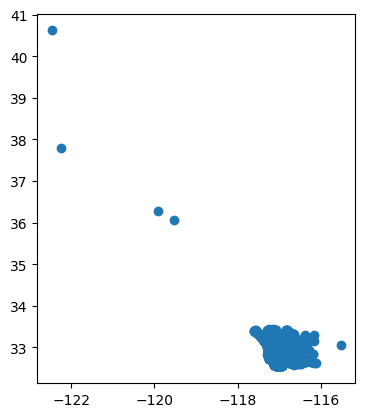

In [7]:
SD_17_21_DUIs_gdf.plot()

In [26]:
# Spatial filter of Southern California
from shapely.geometry import box

# minimum longitude point, min latitude, max long, max lat
# box(min long, min lat, max long, max lat)
SD_bbox = box(-117.45, 28, -116.8, 33.3)

LA_bbox = box(-118.5, 33.6, -117.6, 34.4)

# DUI_SD_gdf.within(box) will return vectors of boolean (True or False) if within box

filtered_DUI_SD_17_21_gdf = SD_17_21_DUIs_gdf[SD_17_21_DUIs_gdf.within(SD_bbox)]
print("San Diego County DUI crashes: ", len(SD_17_21_DUIs_gdf))
print("Filtered SD crashes within BBox: ", len(filtered_DUI_SD_17_21_gdf))

filtered_DUI_LA_17_21_gdf = LA_17_21_DUIs_gdf[LA_17_21_DUIs_gdf.within(LA_bbox)]
print("Los Angeles County DUI crashes: ", len(LA_17_21_DUIs_gdf))
print("Filtered LA crashes within BBox: ", len(filtered_DUI_LA_17_21_gdf))


San Diego County DUI crashes:  8958
Filtered SD crashes within BBox:  8024
Los Angeles County DUI crashes:  23720
Filtered LA crashes within BBox:  20069


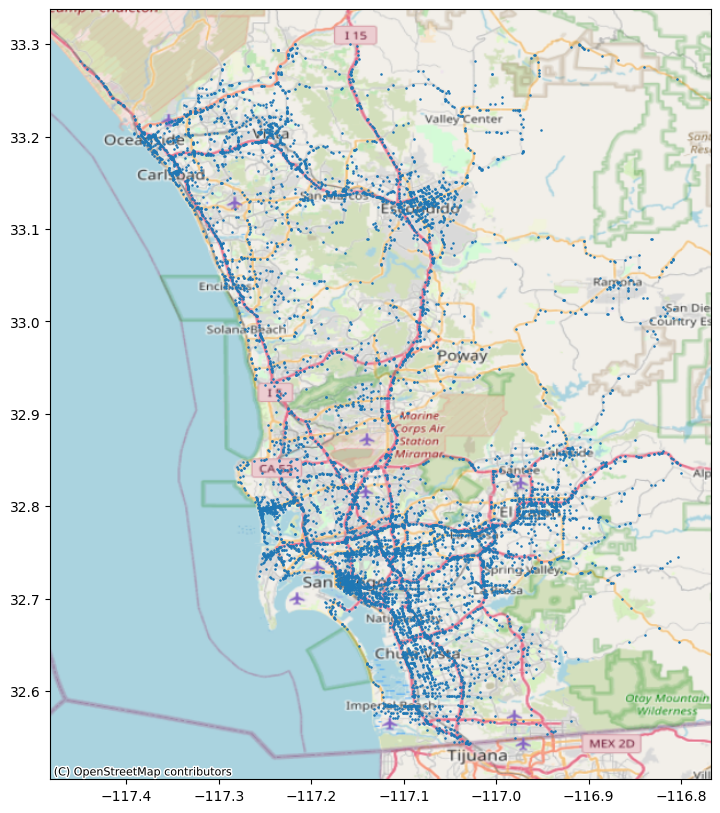

In [17]:
filtered_DUI_SD_17_21_gdf = filtered_DUI_SD_17_21_gdf.set_crs("EPSG: 4326")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
filtered_DUI_SD_17_21_gdf.plot(
    ax=ax,
    markersize=0.7
)

cx.add_basemap(
    zoom = 'auto',
    ax=ax,
    crs=filtered_DUI_SD_17_21_gdf.crs,
    source = cx.providers.OpenStreetMap.Mapnik
)

## Kernel Density Estimate Plot with Seaborn

Text(0.5, 1.0, 'DUI Crashes in San Diego 2017-2021')

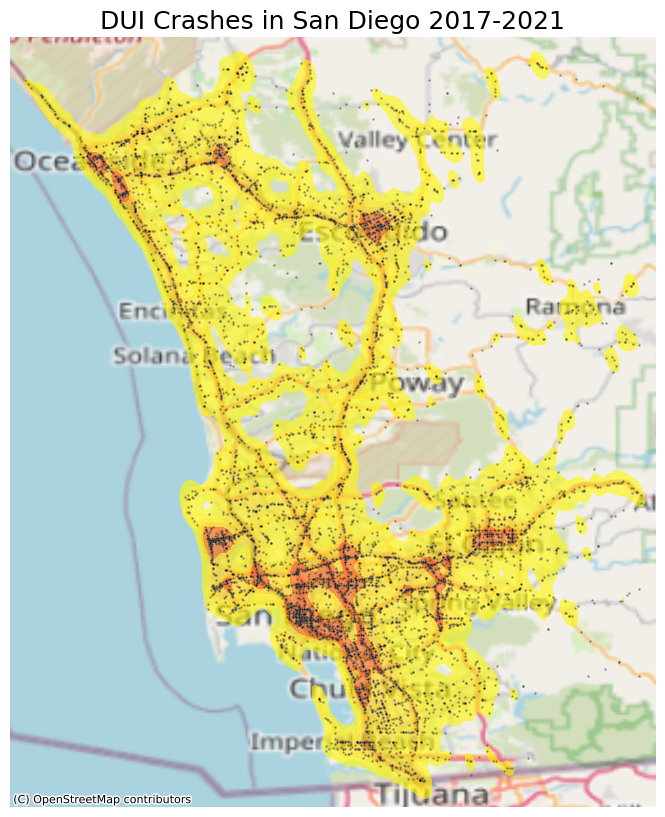

In [19]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

sns.kdeplot(
    ax=ax,
    x = filtered_DUI_SD_17_21_gdf["POINT_X"],
    y = filtered_DUI_SD_17_21_gdf["POINT_Y"],
    n_levels = 5,
    cmap = "autumn_r",  # _r meakes the colorscale in reverse
    fill = True,
    alpha = 0.6,
    bw_adjust = 0.2
)

# Adding points of DUIs
sns.scatterplot(
    x=filtered_DUI_SD_17_21_gdf["POINT_X"],
    y=filtered_DUI_SD_17_21_gdf["POINT_Y"],
    c="black",
    s=3,
    alpha=0.4,
)

# Adding basemap to the map
cx.add_basemap(
    ax=ax,
    source = cx.providers.OpenStreetMap.Mapnik,
    crs = filtered_DUI_SD_17_21_gdf.crs,
    zoom = 9,
)

ax.axis("off")
ax.set_title("DUI Crashes in San Diego 2017-2021", size = 18)

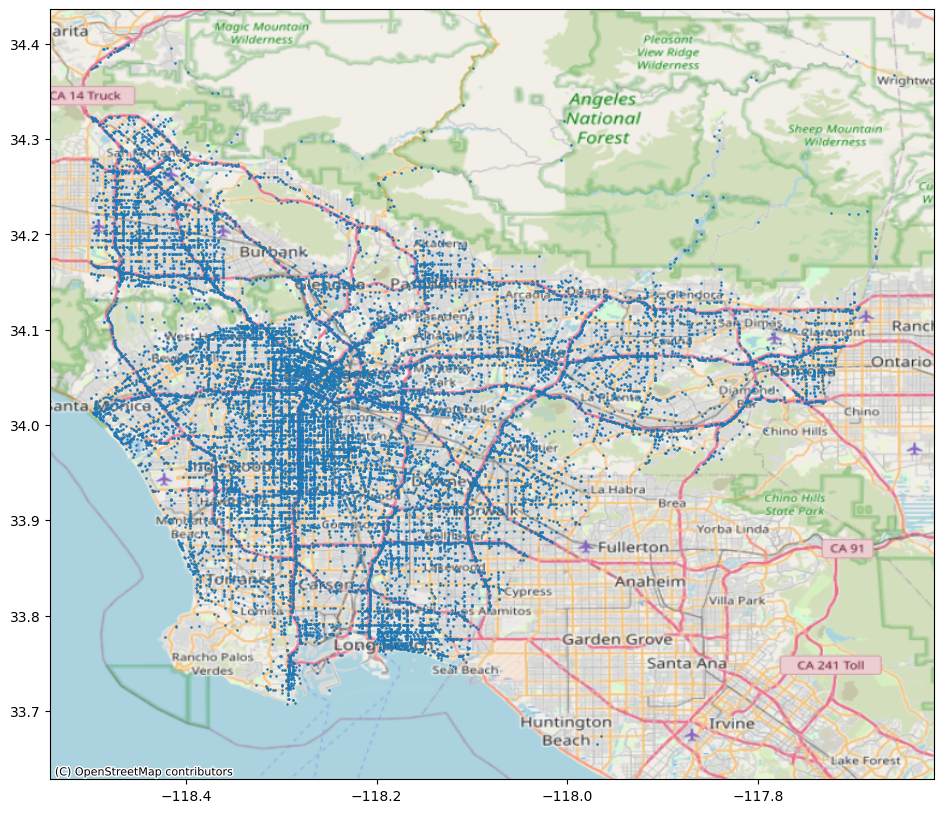

In [27]:
filtered_DUI_LA_17_21_gdf = filtered_DUI_LA_17_21_gdf.set_crs("EPSG: 4326")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
filtered_DUI_LA_17_21_gdf.plot(
    ax=ax,
    markersize=0.7
)

cx.add_basemap(
    zoom = 'auto',
    ax=ax,
    crs=filtered_DUI_LA_17_21_gdf.crs,
    source = cx.providers.OpenStreetMap.Mapnik
)

Text(0.5, 1.0, 'DUI Crashes in Los Angeles 2017-2021')

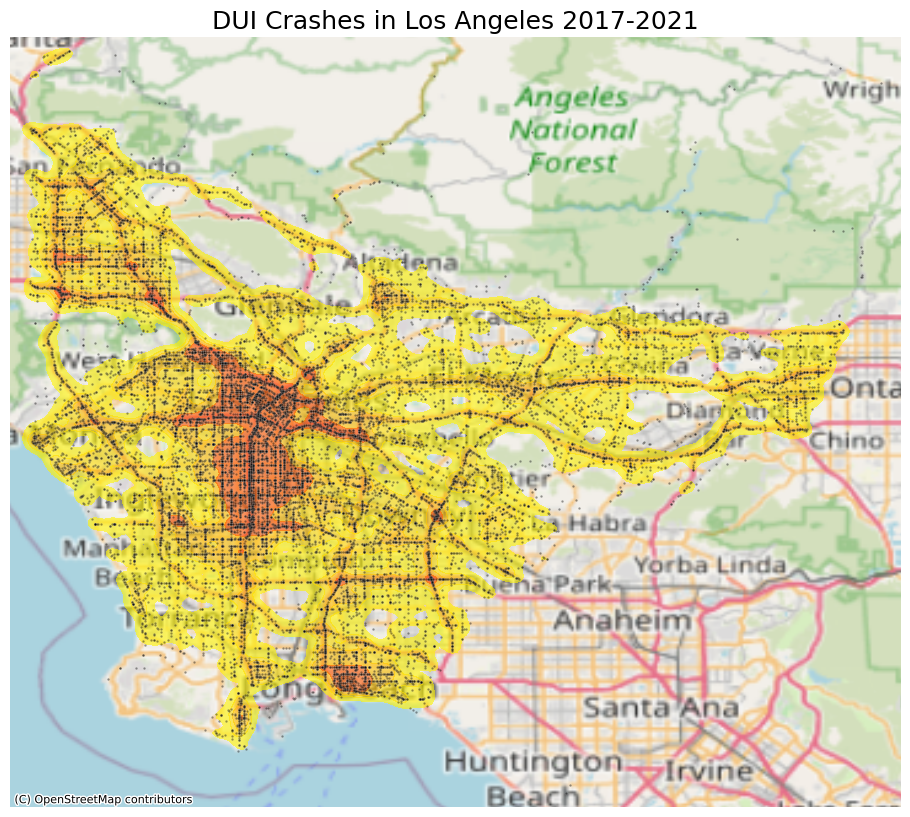

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

sns.kdeplot(
    ax=ax,
    x = filtered_DUI_LA_17_21_gdf["POINT_X"],
    y = filtered_DUI_LA_17_21_gdf["POINT_Y"],
    n_levels = 5,
    cmap = "autumn_r",  # _r meakes the colorscale in reverse
    fill = True,
    alpha = 0.6,
    bw_adjust = 0.2
)

# Adding points of DUIs
sns.scatterplot(
    x=filtered_DUI_LA_17_21_gdf["POINT_X"],
    y=filtered_DUI_LA_17_21_gdf["POINT_Y"],
    c="black",
    s=3,
    alpha=0.4,
)

# Adding basemap to the map
cx.add_basemap(
    ax=ax,
    source = cx.providers.OpenStreetMap.Mapnik,
    crs = filtered_DUI_LA_17_21_gdf.crs,
    zoom = 9,
)

ax.axis("off")
ax.set_title("DUI Crashes in Los Angeles 2017-2021", size = 18)